In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [ ]:
sm, md, lg = 12,9,10
plt.rc('font', size=sm)
plt.rc('axes', labelsize=sm)
plt.rc('xtick', labelsize=md)
plt.rc('ytick', labelsize=md)
plt.rc('legend', fontsize=md)
plt.rc('figure', titlesize=lg)

In [2]:
data = pd.read_csv('../datasets/dropout_ratio.csv')
data.head(2)

State_UT     year Primary_Boys Primary_Girls Primary_Total  \
0  A & N Islands  2012-13         0.83          0.51          0.68   
1  A & N Islands  2013-14         1.35          1.06          1.21   

  Upper Primary_Boys Upper Primary_Girls Upper Primary_Total Secondary _Boys  \
0     Uppe_r_Primary                1.09                1.23            5.57   
1                 NR                1.54                0.51            8.36   

  Secondary _Girls Secondary _Total HrSecondary_Boys HrSecondary_Girls  \
0             5.55             5.56            17.66             10.15   
1             5.98              7.2            18.94              12.2   

  HrSecondary_Total  
0             14.14  
1             15.87

# LOADING DATA 

In [3]:
dropout = pd.read_csv('../datasets/dropout_ratio.csv')
enroll = pd.read_csv('../datasets/enrollment_ratio.csv')
comps = pd.read_csv('../datasets/percentage-of-schools-with-comps.csv')
electricity = pd.read_csv('../datasets/percentage-of-schools-with-electricity.csv')
water = pd.read_csv('../datasets/percentage-of-schools-with-water-facility.csv')
boys_toilet = pd.read_csv('../datasets/schools-with-boys-toilet.csv')
girls_toilet = pd.read_csv('../datasets/schools-with-girls-toilet.csv')



In [4]:
#dropout.set_index('State_UT', inplace=True)
#electricity.set_index('State_UT',inplace=True)
#enroll.set_index('State_UT', inplace=True)
#comps.set_index('State_UT',inplace=True)
#water.set_index('State/UT', inplace=True)
#boys_toilet.set_index('State_UT',inplace=True)
#girls_toilet.set_index('State_UT',inplace=True)

In [5]:
sm, md, lg = 12,9,10
plt.rc('font', size=sm)
plt.rc('axes', labelsize=sm)
plt.rc('xtick', labelsize=md)
plt.rc('ytick', labelsize=md)
plt.rc('legend', fontsize=md)
plt.rc('figure', titlesize=lg)

In [6]:
boys = pd.read_csv('../datasets//schools-with-boys-toilet.csv')
girls = pd.read_csv('../datasets/schools-with-girls-toilet.csv')


In [7]:
len(boys.State_UT.unique()), len(girls.State_UT.unique())

(37, 37)

In [8]:
boys.head(2)

State_UT     year  Primary_Only  Primary_with_U_Primary  \
0  Andaman & Nicobar Islands  2013-14         91.58                   97.37   
1  Andaman & Nicobar Islands  2014-15        100.00                  100.00   

   Primary_with_U_Primary_Sec_HrSec  U_Primary_Only  U_Primary_With_Sec_HrSec  \
0                             100.0             0.0                     100.0   
1                             100.0           100.0                     100.0   

   Primary_with_U_Primary_Sec  U_Primary_With_Sec  Sec_Only  Sec_with_HrSec.  \
0                       100.0                 0.0       0.0            100.0   
1                       100.0                 0.0       0.0            100.0   

   HrSec_Only  All Schools  
0         0.0        94.52  
1         0.0       100.00

In [9]:
boys_melt = pd.melt(boys, id_vars=['State_UT', 'year'], var_name='School_Level', value_name = 'toilet')
girls_melt = pd.melt(girls, id_vars=['State_UT', 'year'], var_name='School_Level', value_name = 'toilet')

In [10]:
boys_melt.head(2)

State_UT     year  School_Level  toilet
0  Andaman & Nicobar Islands  2013-14  Primary_Only   91.58
1  Andaman & Nicobar Islands  2014-15  Primary_Only  100.00

In [11]:
categ = boys.columns.to_list()[5:] # All student category type in a list
categ

['U_Primary_Only',
 'U_Primary_With_Sec_HrSec',
 'Primary_with_U_Primary_Sec',
 'U_Primary_With_Sec',
 'Sec_Only',
 'Sec_with_HrSec.',
 'HrSec_Only',
 'All Schools']

# TOILET FACILITIES FOR BOYS IN  ALL STUDENT CATEGORIES


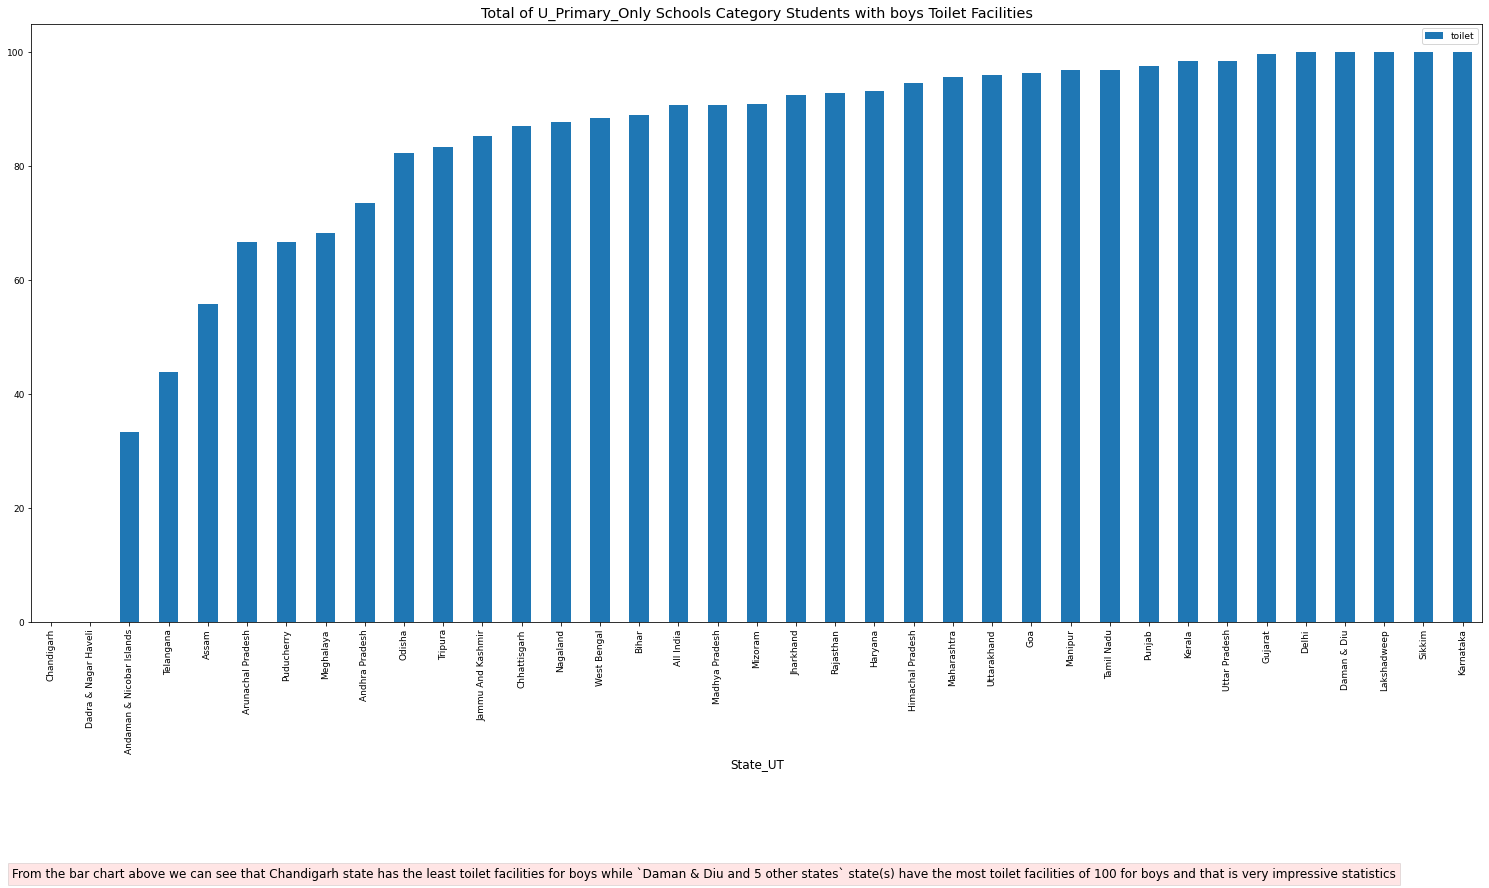

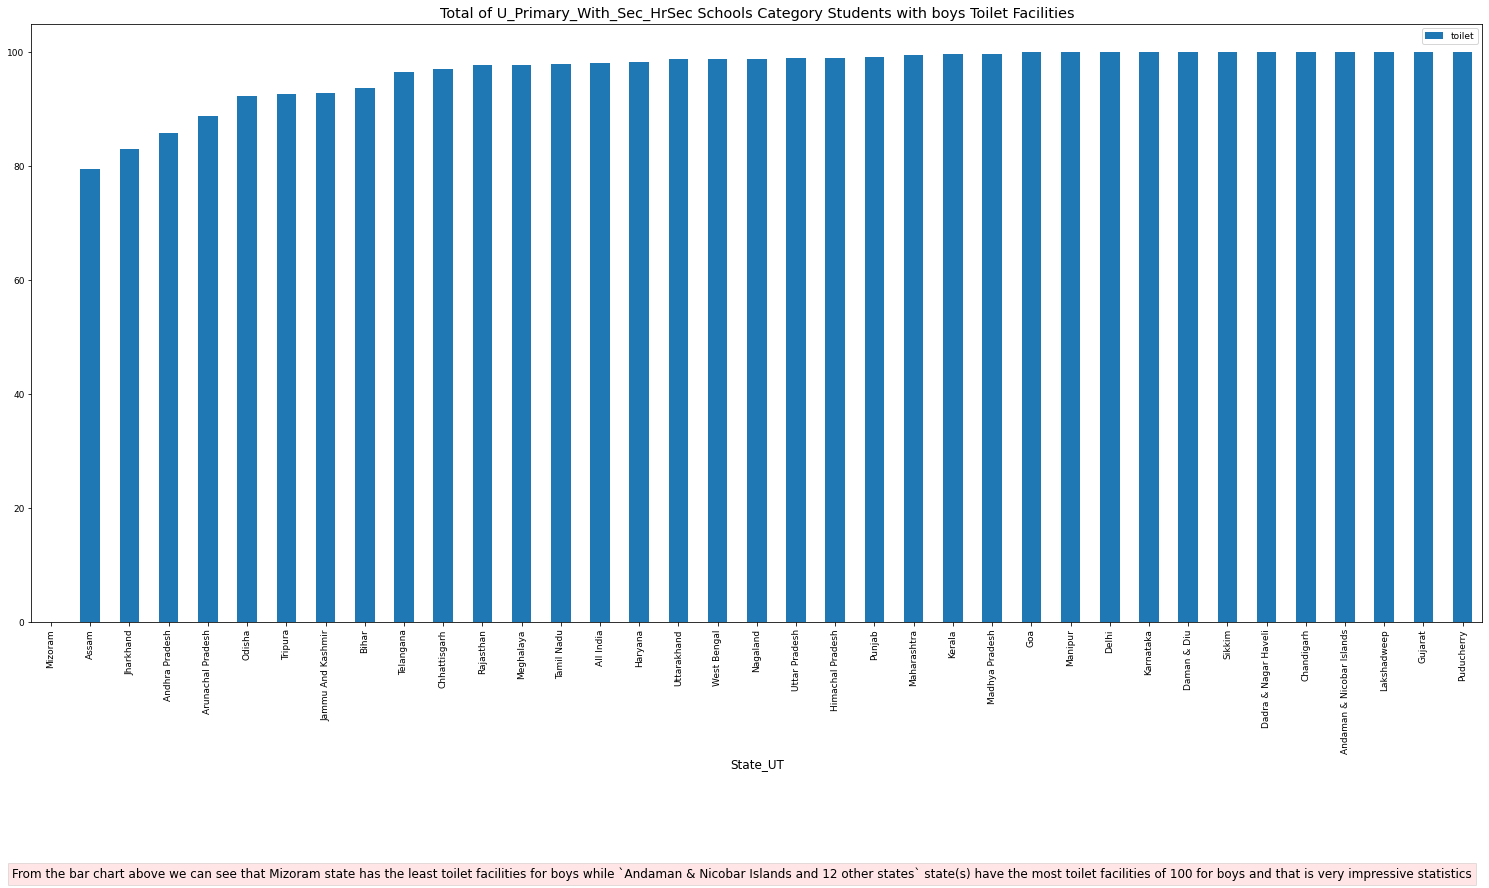

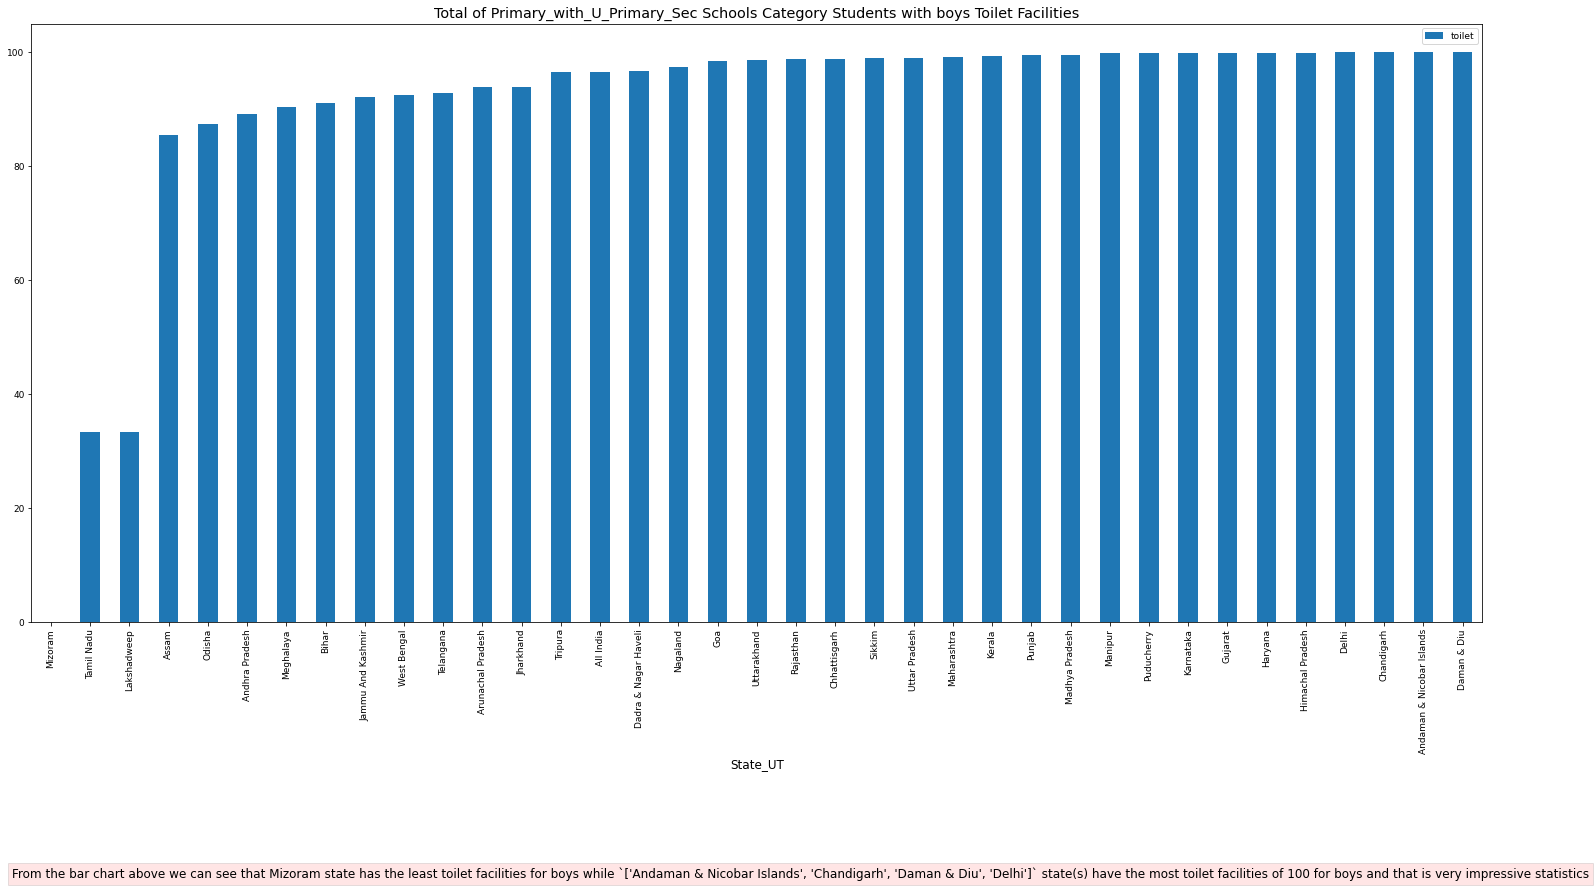

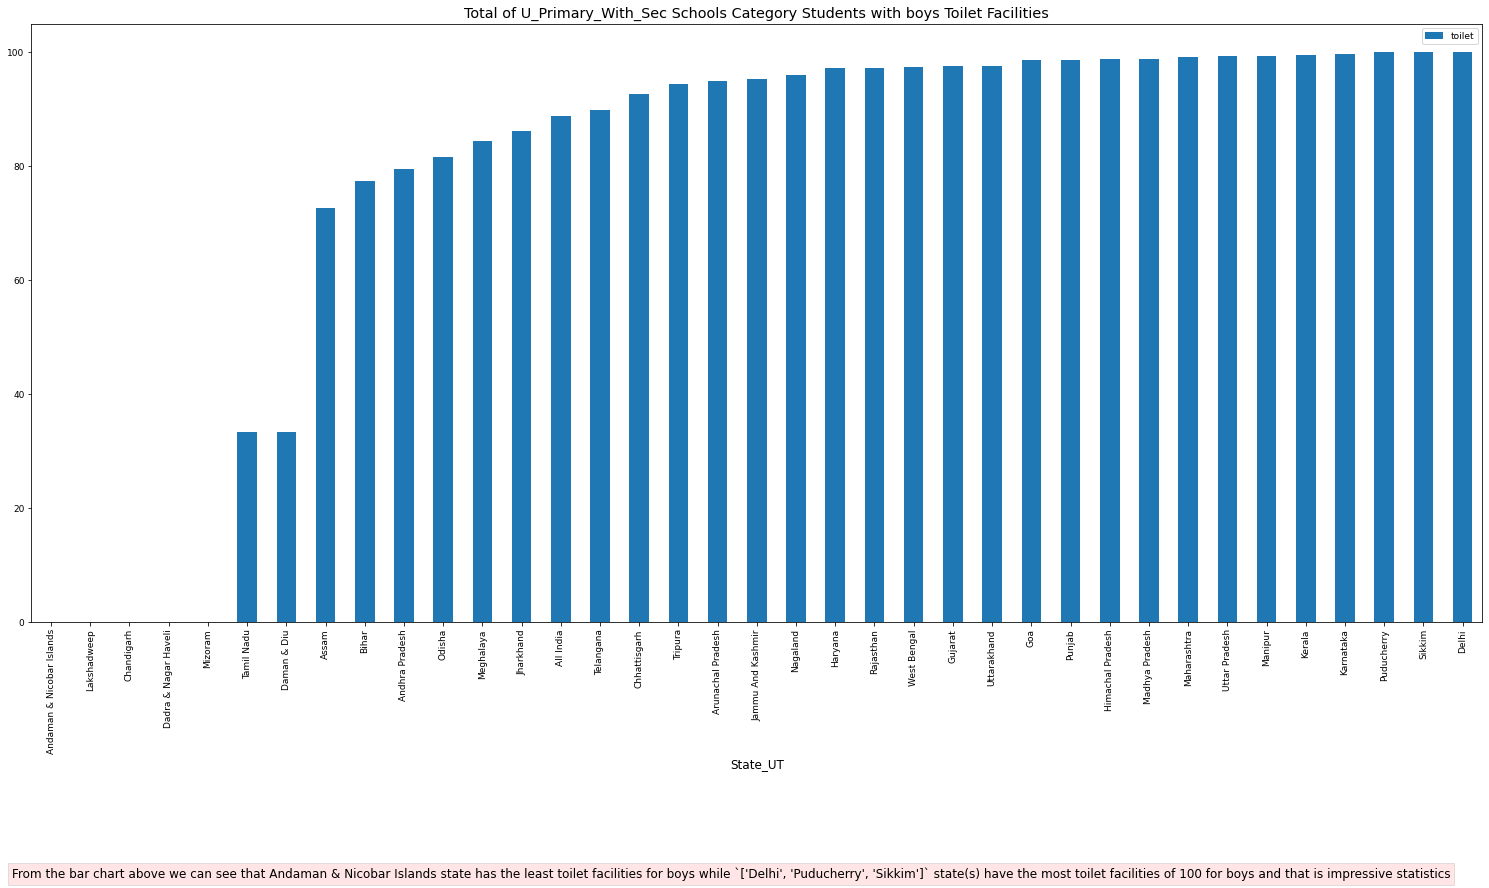

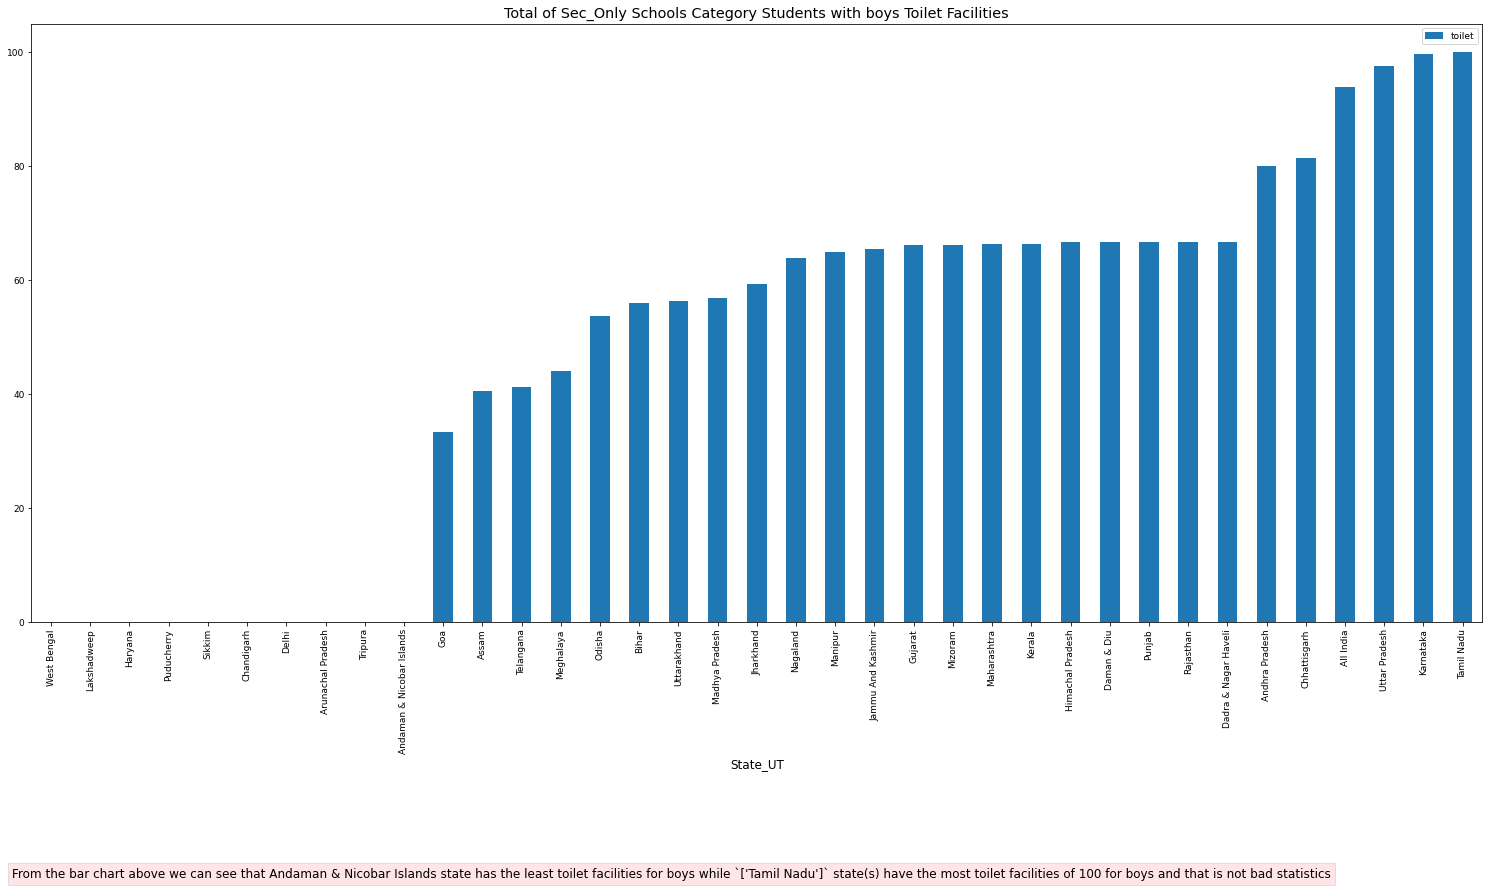

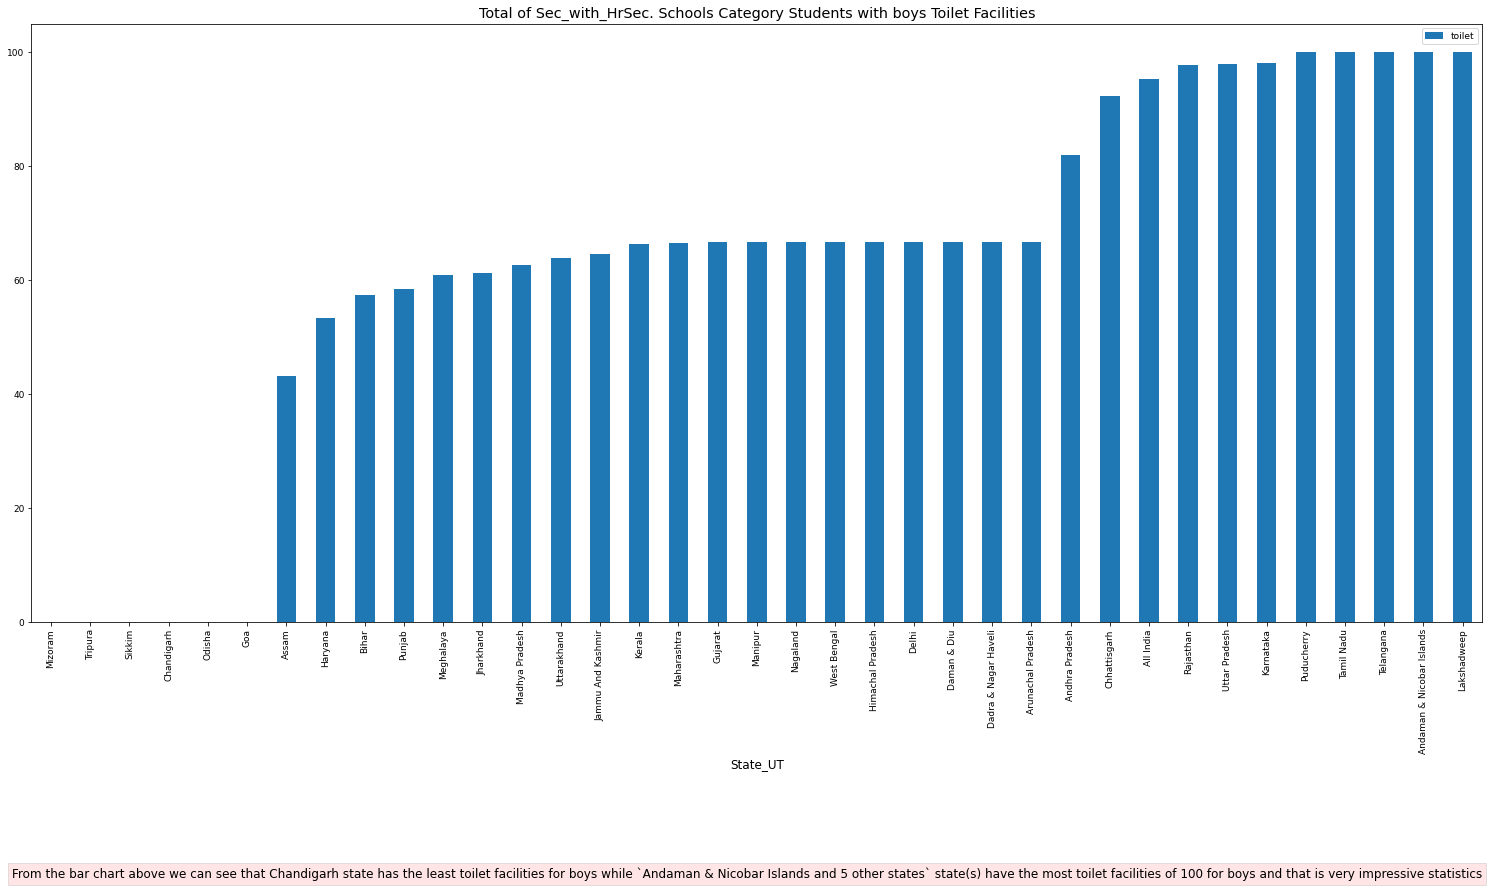

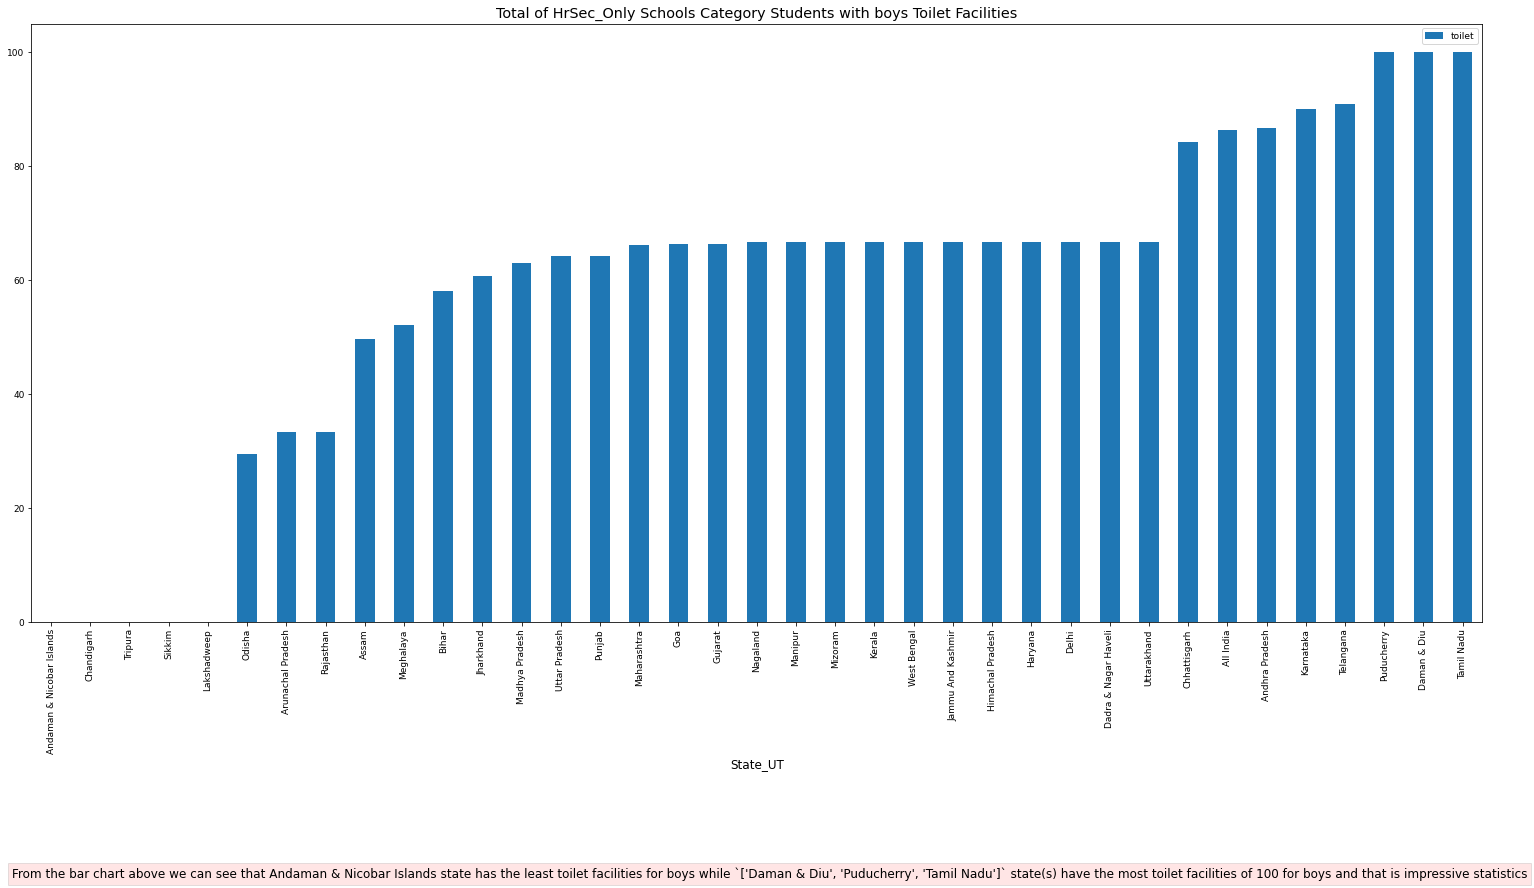

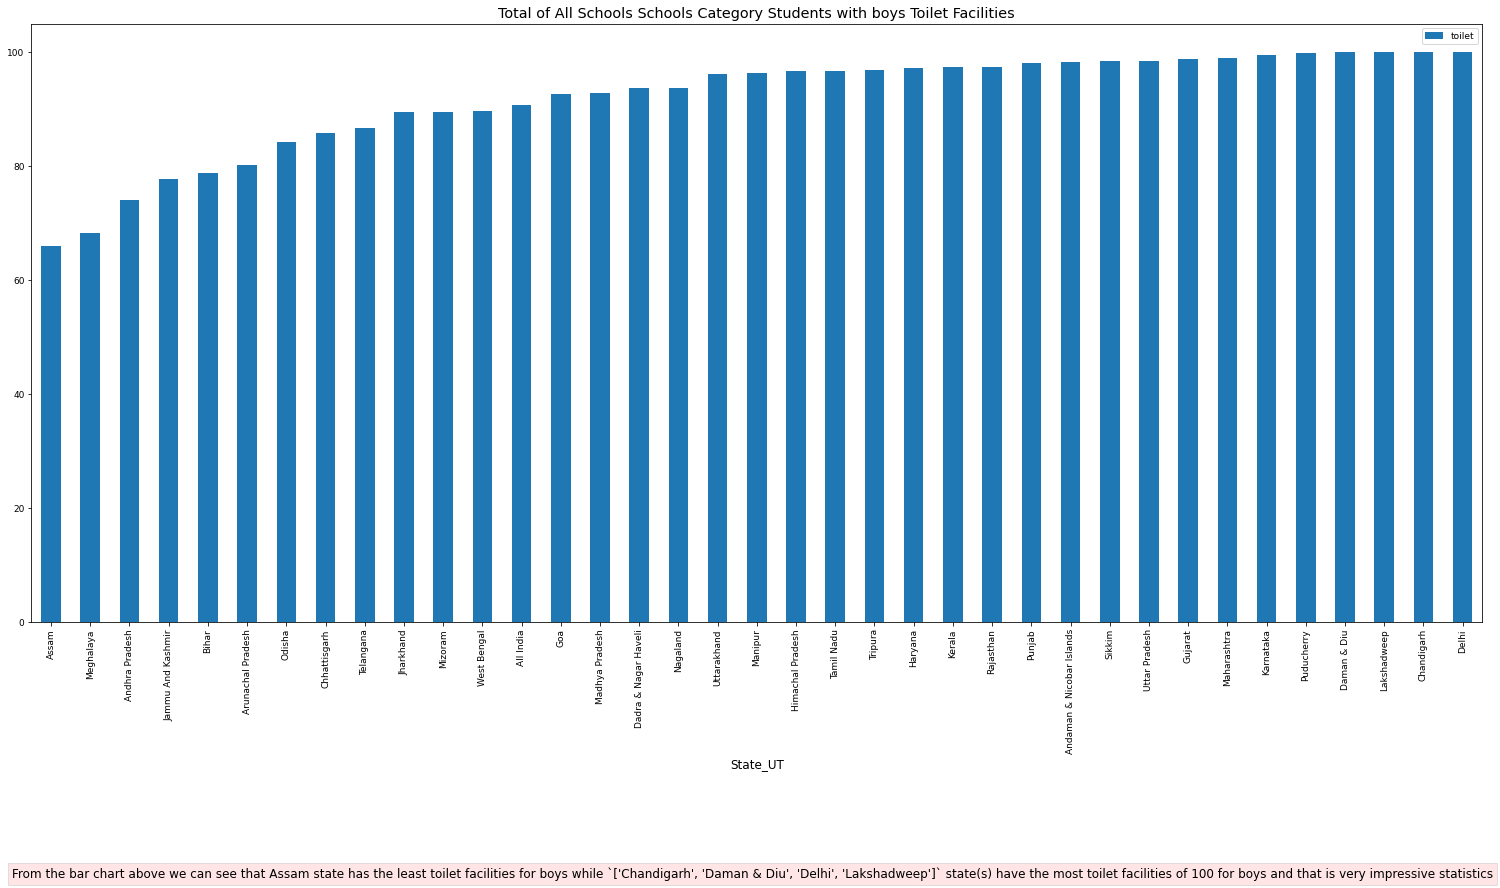

In [12]:
for category in categ:
    tmp_boys = boys_melt[boys_melt['School_Level'] == category]
    mean_tmp_boys = tmp_boys.groupby(['State_UT'], as_index=False).mean()
    mean_tmp_boys.set_index('State_UT').sort_values('toilet').plot(kind='bar', figsize=(26,11), title ='Total of {} Schools Category Students with boys Toilet Facilities'.format(category))
    tmp_highest = mean_tmp_boys.iloc[np.where(mean_tmp_boys['toilet'] == 100)].State_UT.to_list()
    tmp_lowest = mean_tmp_boys.iloc[mean_tmp_boys.toilet.idxmin()].State_UT
    
    if len(tmp_highest) == 1: impression = 'not bad'
    elif  len(tmp_highest) == 2: impression = 'okay'
    elif  len(tmp_highest) == 3: impression = 'impressive'
    else: impression = 'very impressive'
        
    if len(tmp_highest) > 4:
        tmp_highest = tmp_highest[0] + ' and {} other states'.format(len(tmp_highest)) # In the case when we have to many states that have 100 toilet facilities and can't display all
    
    info = 'From the bar chart above we can see that {} state has the least toilet facilities for boys while `{}` state(s) have the most toilet facilities of 100 for boys and that is {} statistics'.format(tmp_lowest, tmp_highest, impression)
    plt.text(x=-1, y=-45 , s = info, bbox=dict(facecolor='red', alpha=0.1))

# TOILET FACILITIES FOR GIRLS IN ALL STUDENT CATEGORIES


In [13]:
girls_melt.head(2)

State_UT     year  School_Level  toilet
0  All India  2013-14  Primary_Only   88.68
1  All India  2014-15  Primary_Only   91.21

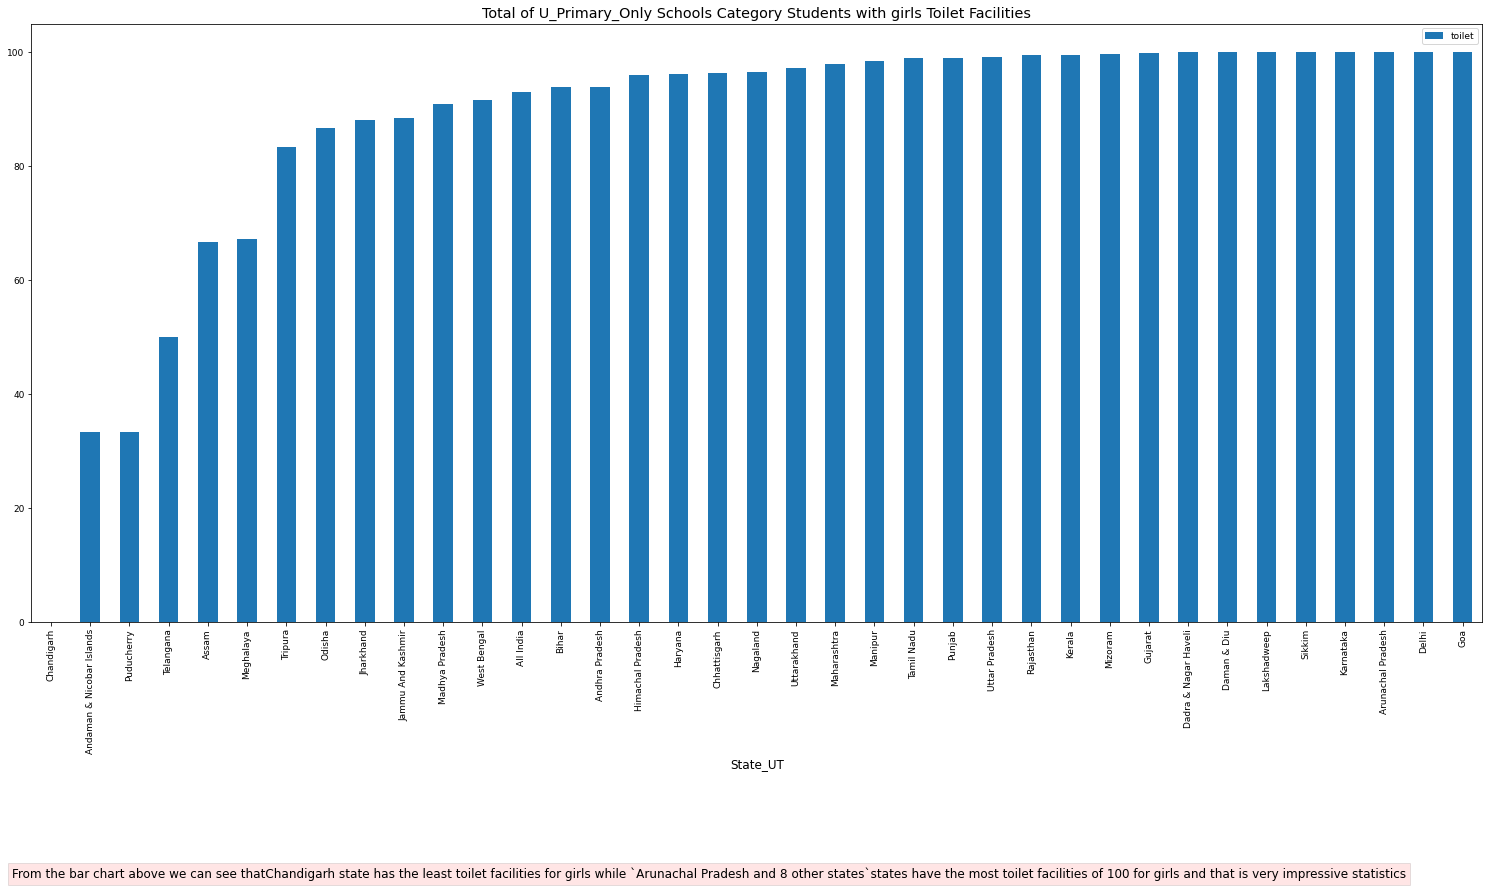

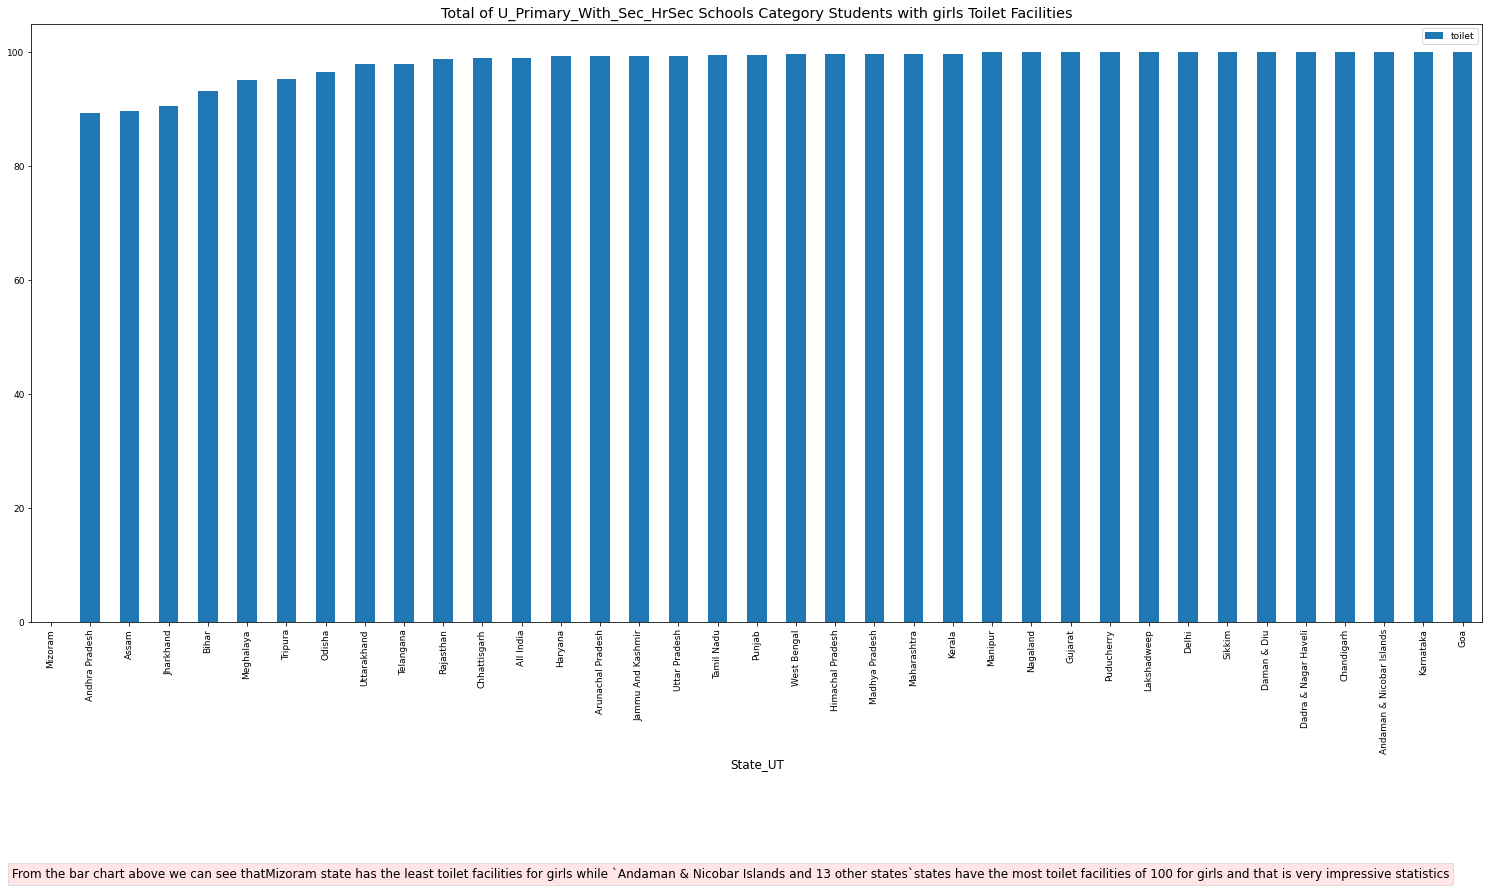

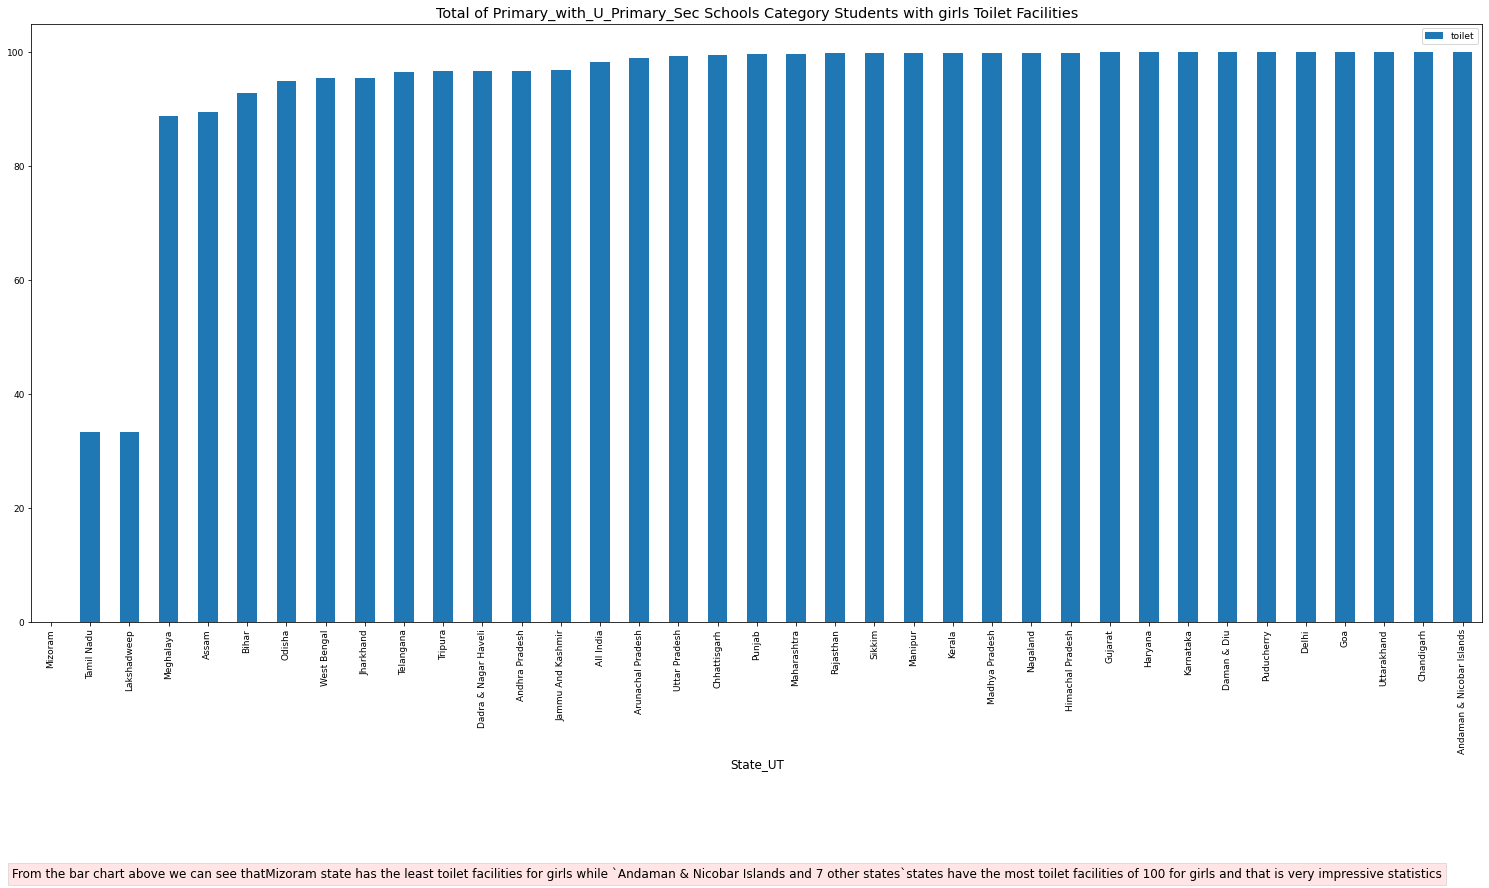

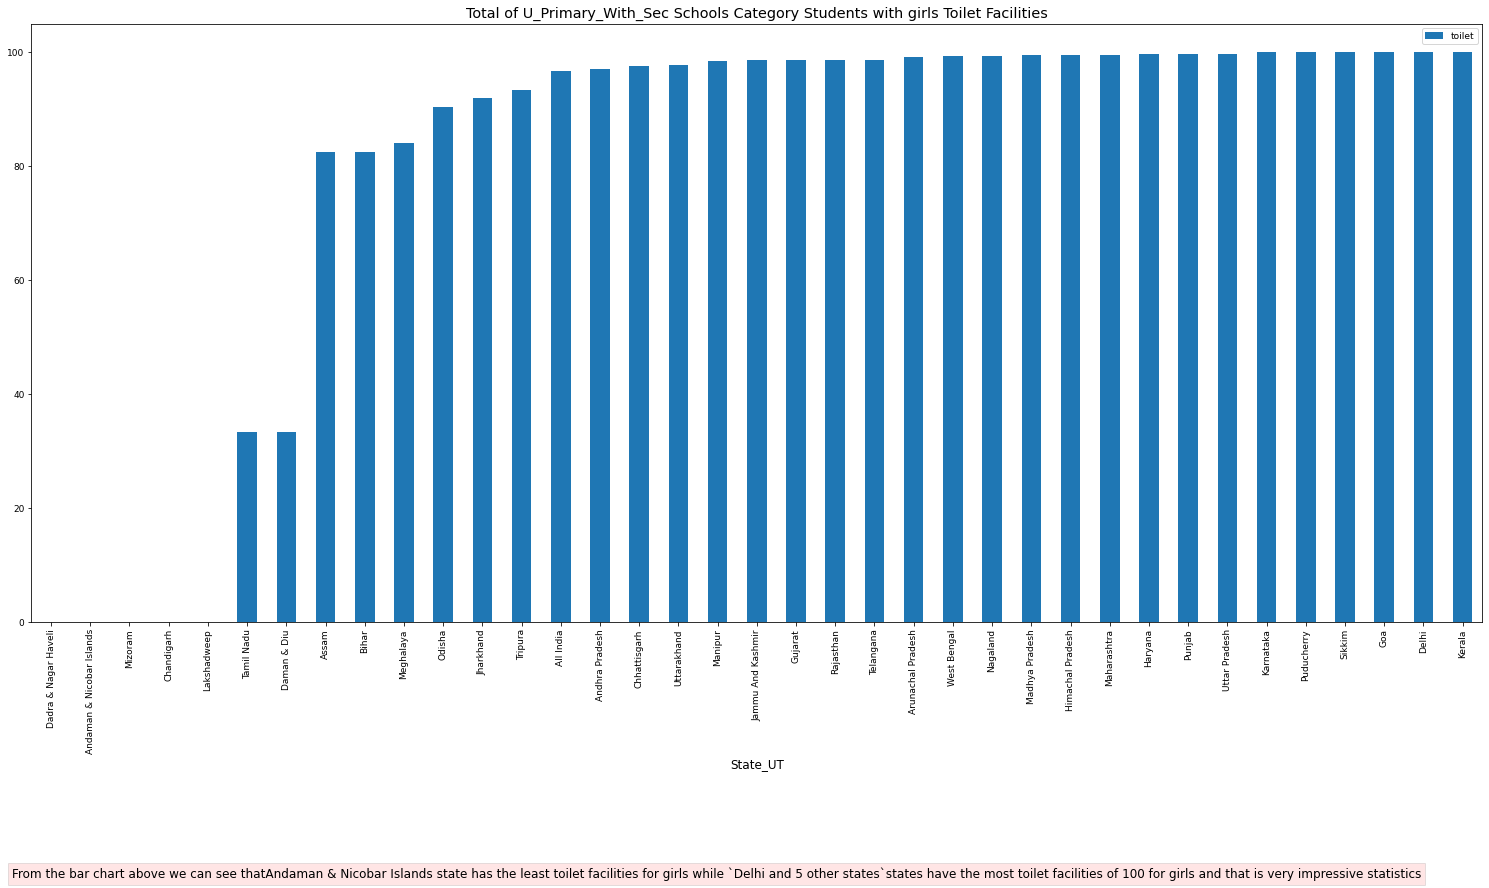

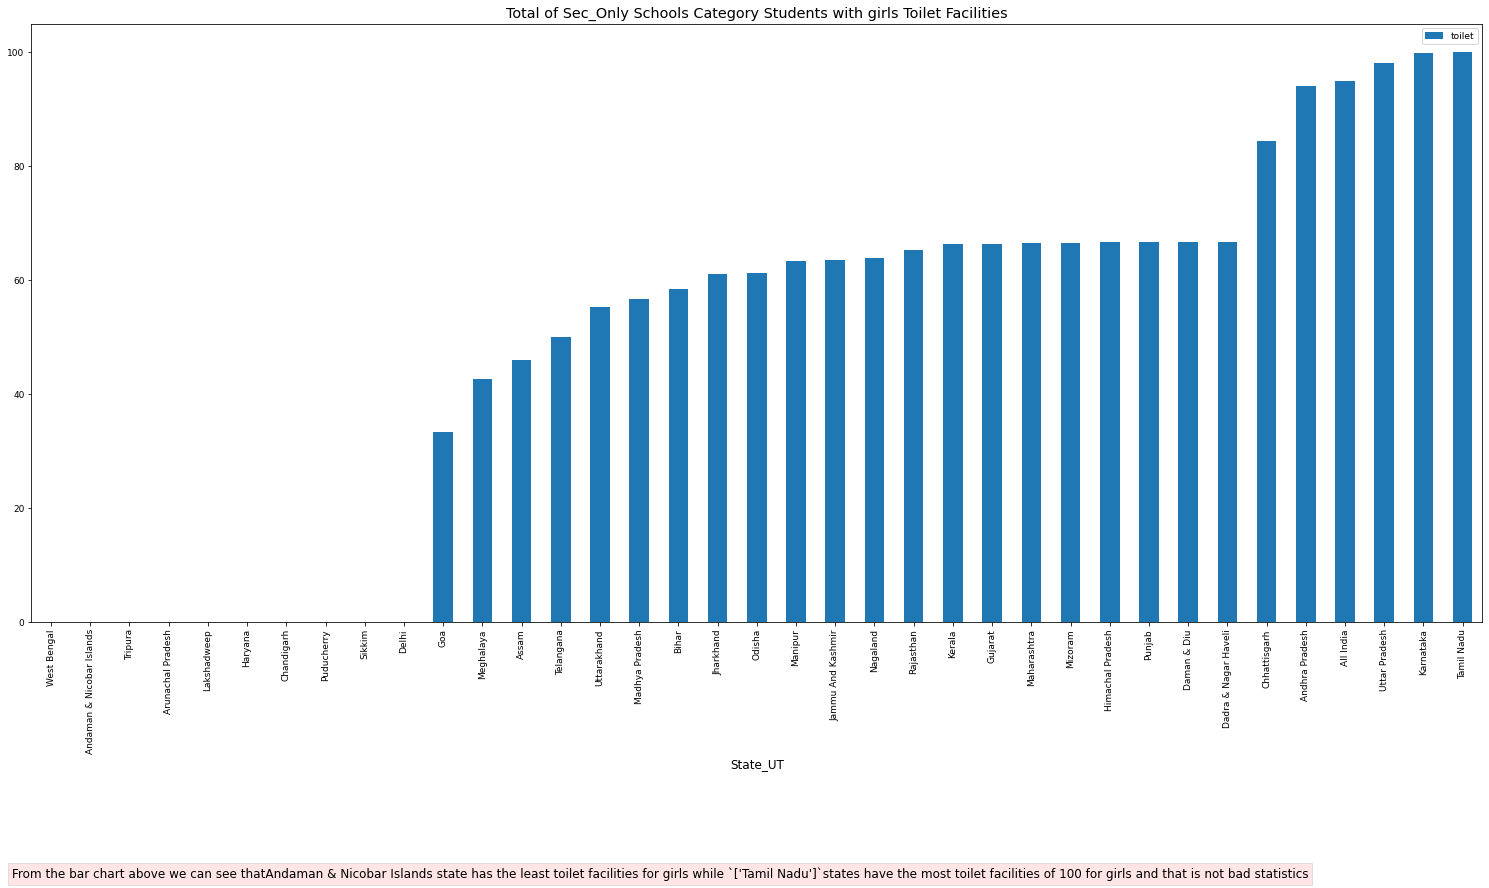

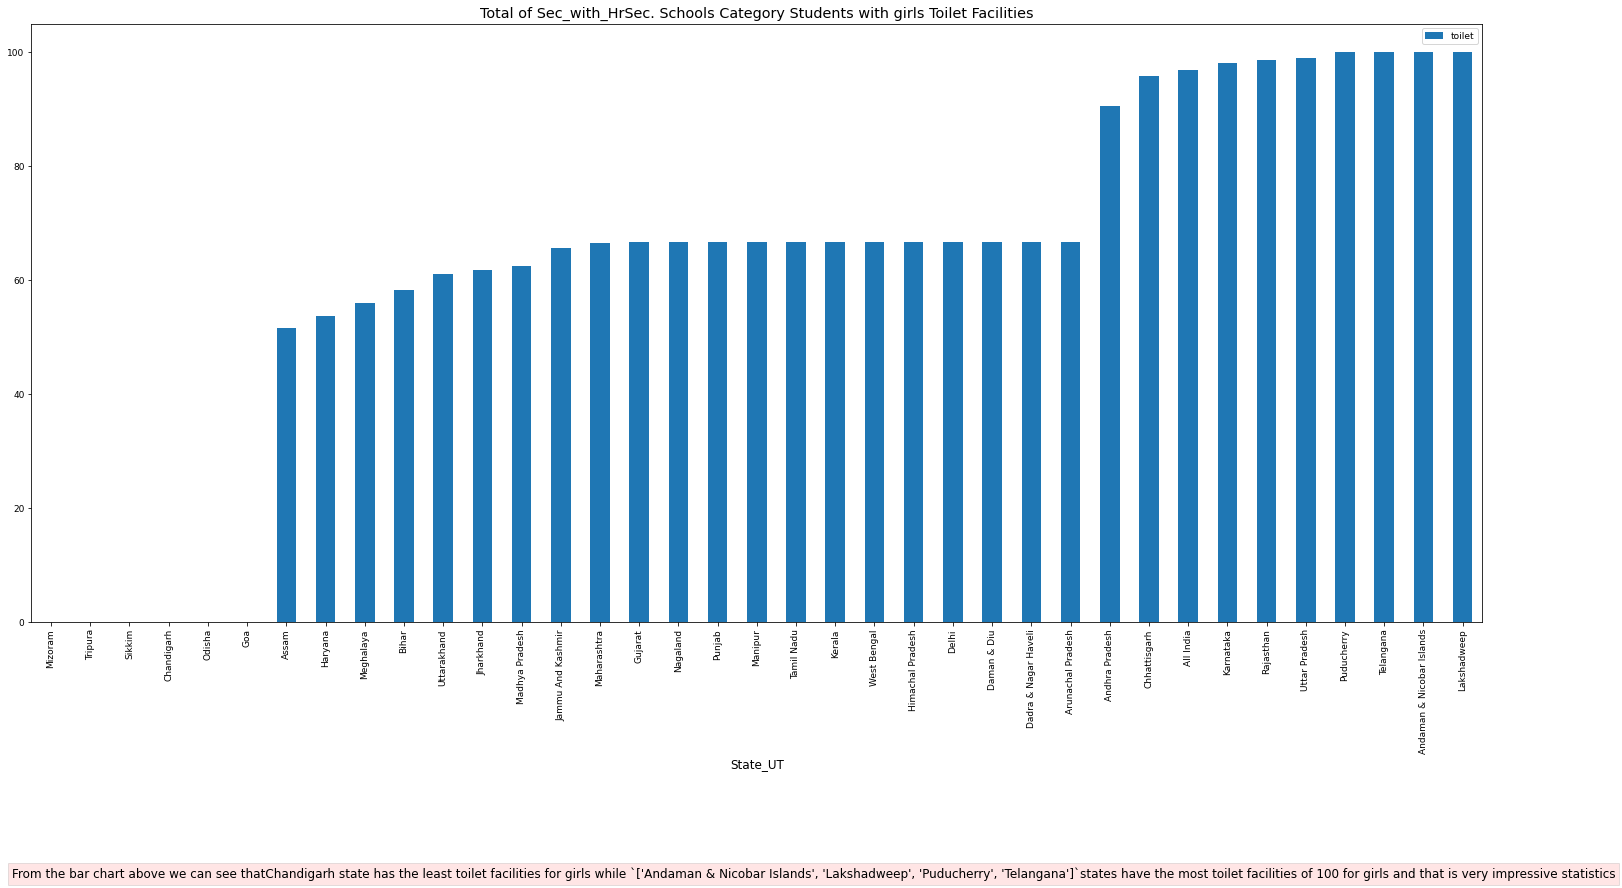

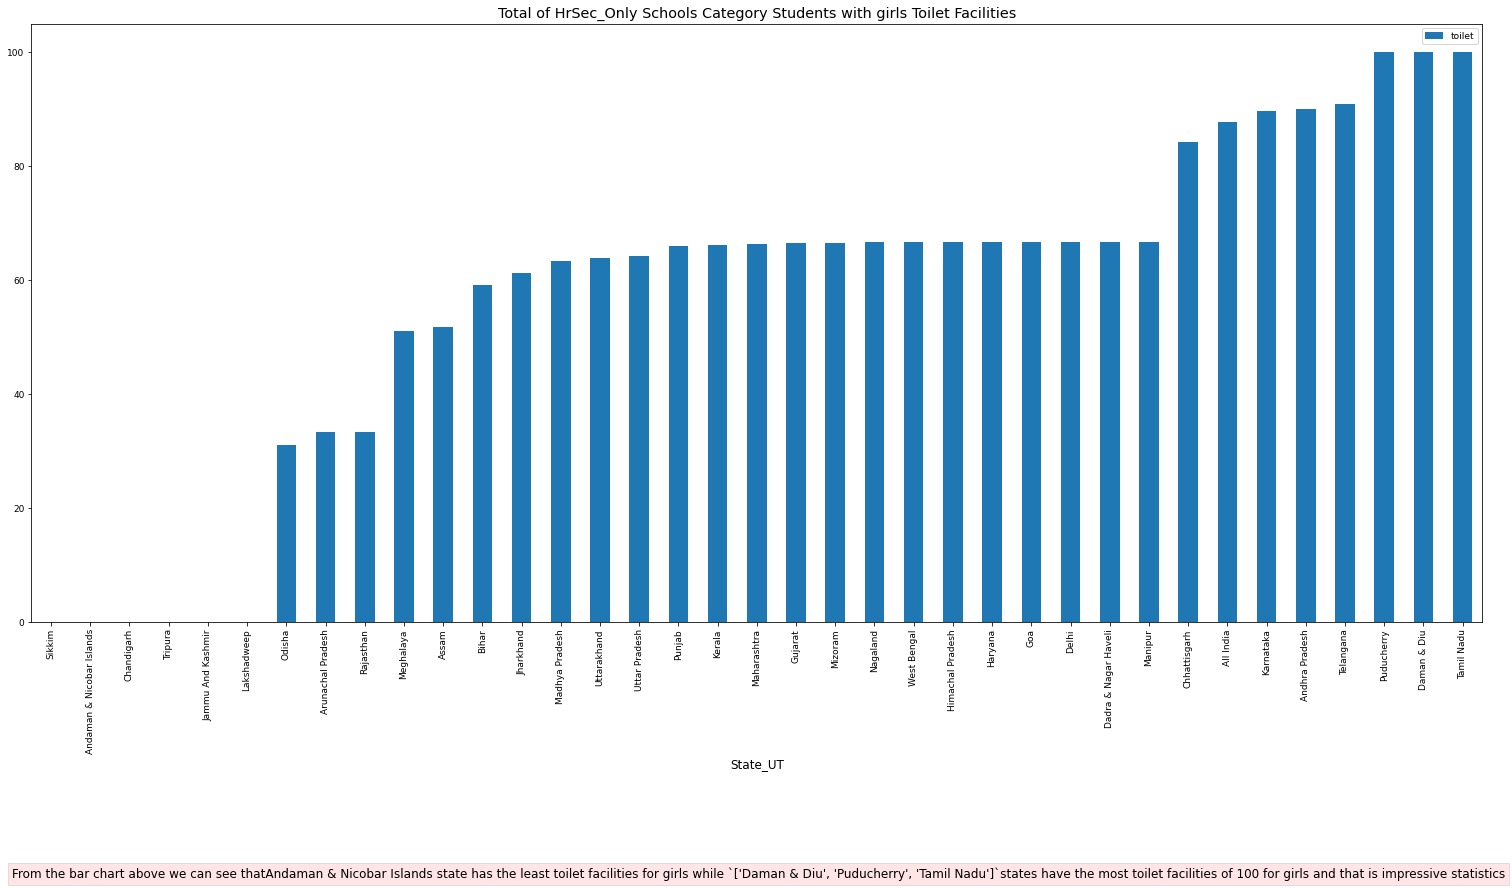

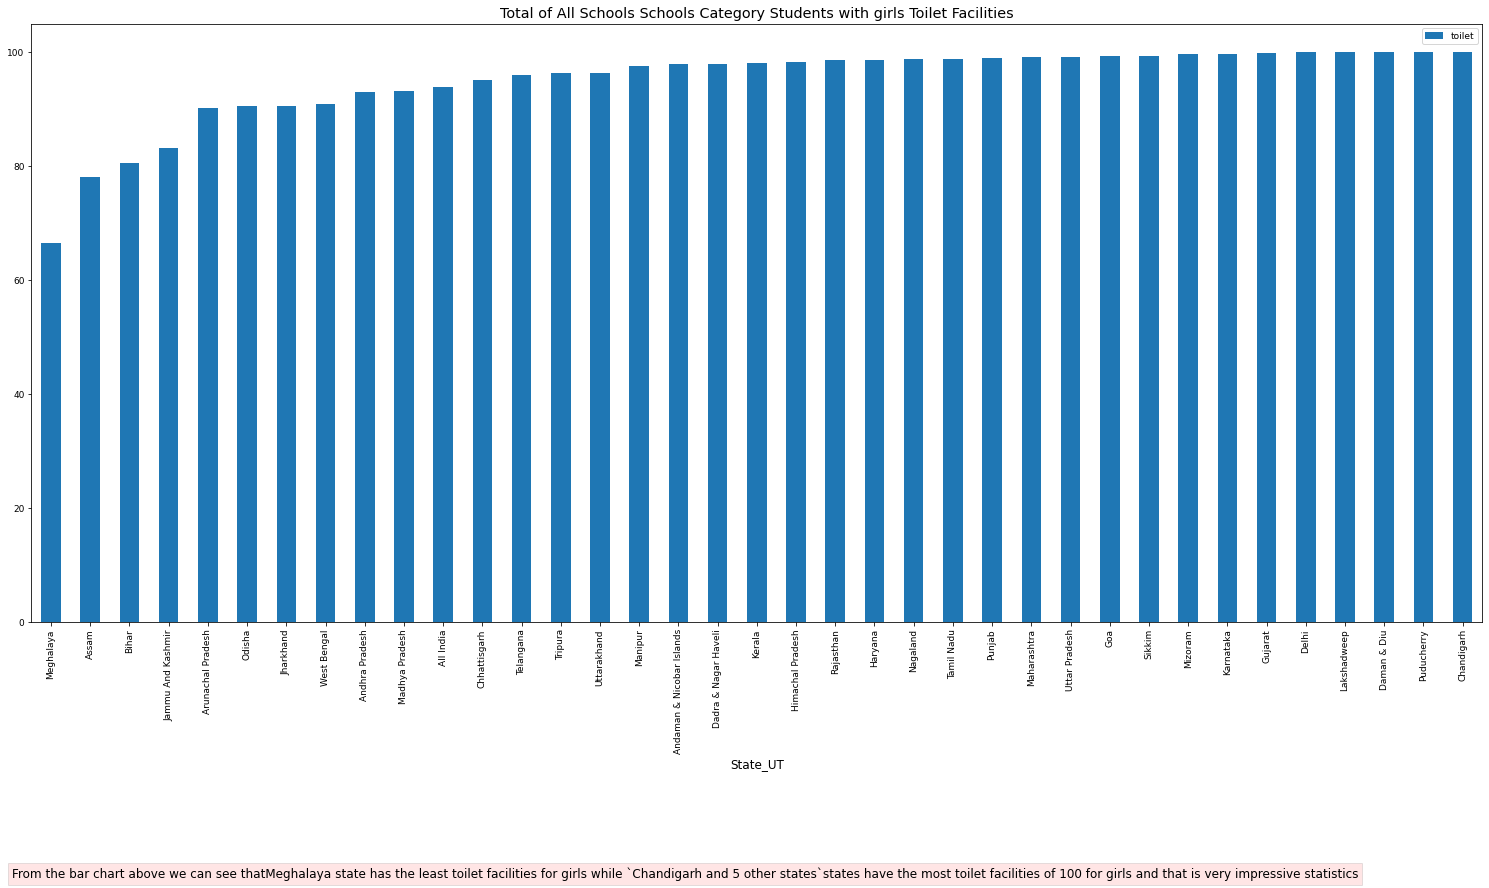

In [14]:
for category in categ:
    tmp_girls = girls_melt[girls_melt['School_Level'] == category]
    mean_tmp_girls = tmp_girls.groupby(['State_UT'], as_index=False).mean()
    mean_tmp_girls.set_index('State_UT').sort_values('toilet').plot(kind='bar', figsize=(26,11), title ='Total of {} Schools Category Students with girls Toilet Facilities'.format(category))
    tmp_highest = mean_tmp_girls.iloc[np.where(mean_tmp_girls['toilet'] == 100)].State_UT.to_list()
    tmp_lowest = mean_tmp_girls.iloc[mean_tmp_girls.toilet.idxmin()].State_UT
    
    if len(tmp_highest) == 1: impression = 'not bad'
    elif  len(tmp_highest) == 2: impression = 'okay'
    elif  len(tmp_highest) == 3: impression = 'impressive'
    else: impression = 'very impressive'
        
    if len(tmp_highest) > 4:
        tmp_highest = tmp_highest[0] + ' and {} other states'.format(len(tmp_highest))
    
    info = 'From the bar chart above we can see that{} state has the least toilet facilities for girls while `{}`states have the most toilet facilities of 100 for girls and that is {} statistics'.format(tmp_lowest, tmp_highest, impression)
    plt.text(x=-1, y=-45 , s = info, bbox=dict(facecolor='red', alpha=0.1))

TOILET FACILITIES IN 2013-2014 SESSION

BOYS

In [15]:
boys_2013 = boys_melt.iloc[np.where(boys_melt.year=='2013-14')]


In [16]:
boys_2013.head(2)


State_UT     year  School_Level  toilet
0  Andaman & Nicobar Islands  2013-14  Primary_Only   91.58
3             Andhra Pradesh  2013-14  Primary_Only   53.03

In [17]:
boys_2013.shape

(396, 4)

<AxesSubplot:title={'center':'Toilet Failities for boys in all School Categories in 2013-14 session'}, xlabel='School_Level'>

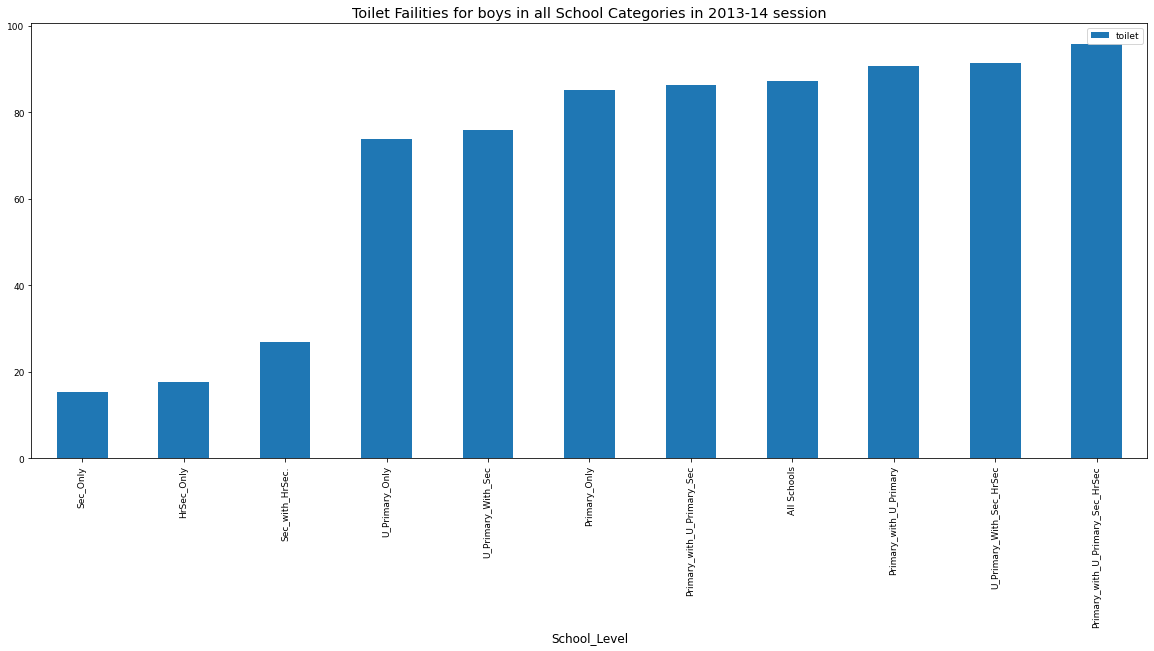

In [18]:



boys_2013.groupby(['School_Level']).mean().sort_values(by='toilet').plot(kind='bar',
figsize=(20,8),title = 'Toilet Failities for boys in all School Categories in 2013-14 session')

# From the above bar chart , we can clearly see that toilets facilities weren't much in secondary schools in 2013-14 session.

Toilet Facilities(BOYS) in 2014-2015 session

<AxesSubplot:title={'center':'Toilet Failities for boys in all School Categories in 2014-15 session'}, xlabel='School_Level'>

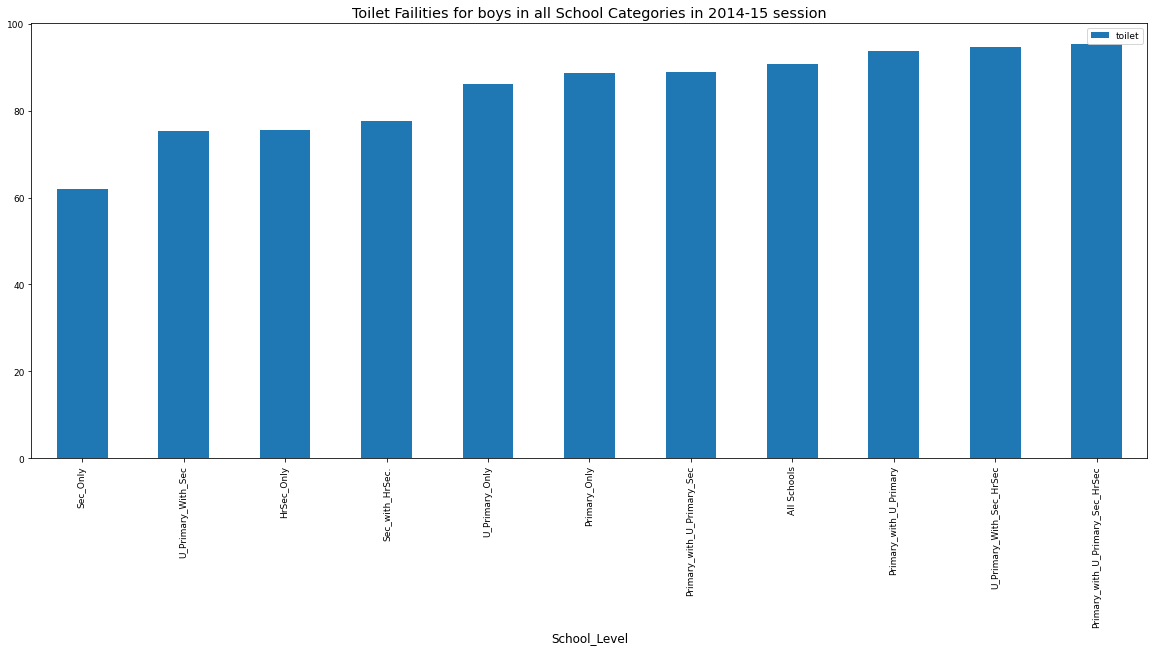

In [19]:
boys_2014 = boys_melt.iloc[np.where(boys_melt.year=='2014-15')]
boys_2014.head(2)
boys_2014.shape


boys_2014.groupby(['School_Level']).mean().sort_values(by='toilet').plot(kind='bar',
figsize=(20,8),title = 'Toilet Failities for boys in all School Categories in 2014-15 session')

# From the  above bar chart  we can see rapid rise in the toilets facilities of in secondary schools in 2014-15 session, compared to last session, this is a big improvement

Toilet Facilities(BOYS) in 2015-2016 session

<AxesSubplot:title={'center':' Toilet Failities for boys in all School Categories in 2015-16 session'}, xlabel='School_Level'>

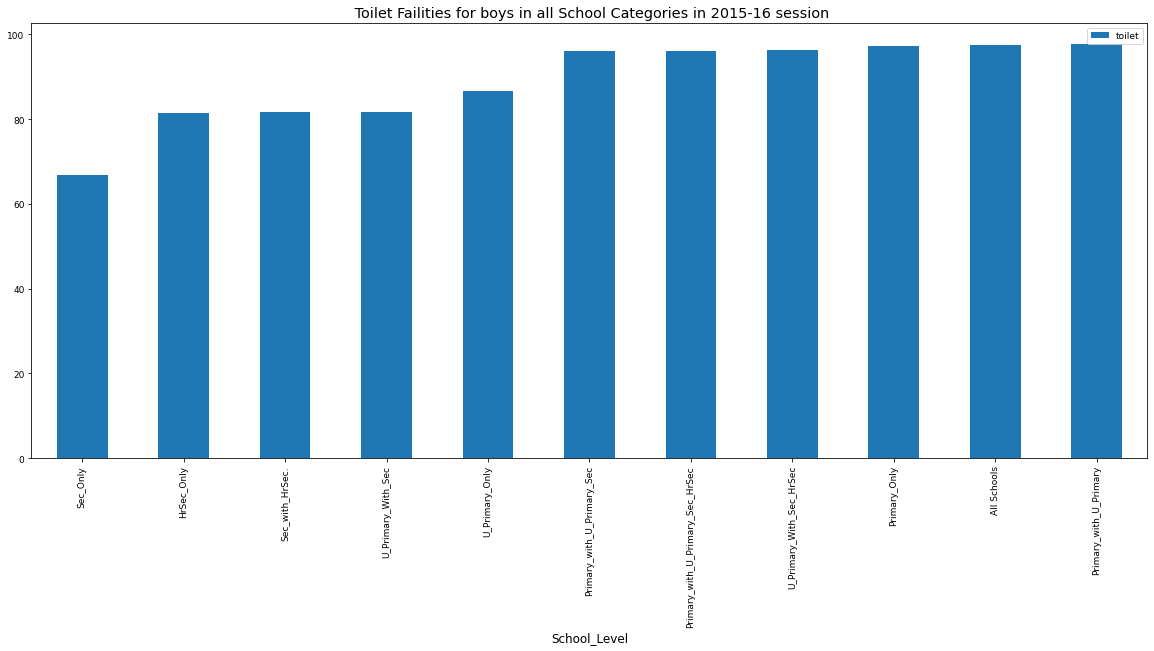

In [20]:
boys_2015 = boys_melt.iloc[np.where(boys_melt.year == '2015-16')]
boys_2015.head(3)
boys_2015.shape

boys_2015.groupby(['School_Level']).mean().sort_values(by = 'toilet').plot( kind = 'bar',
figsize = (20,8), title=' Toilet Failities for boys in all School Categories in 2015-16 session') 


There's little increase in the toilet facilities for secondary school students.

 # Toilet Facilities in 2013-2014 session

GIRLS

<AxesSubplot:title={'center':'Toilet Facilities for girls in all School Categories in 2013-14 session'}, xlabel='School_Level'>

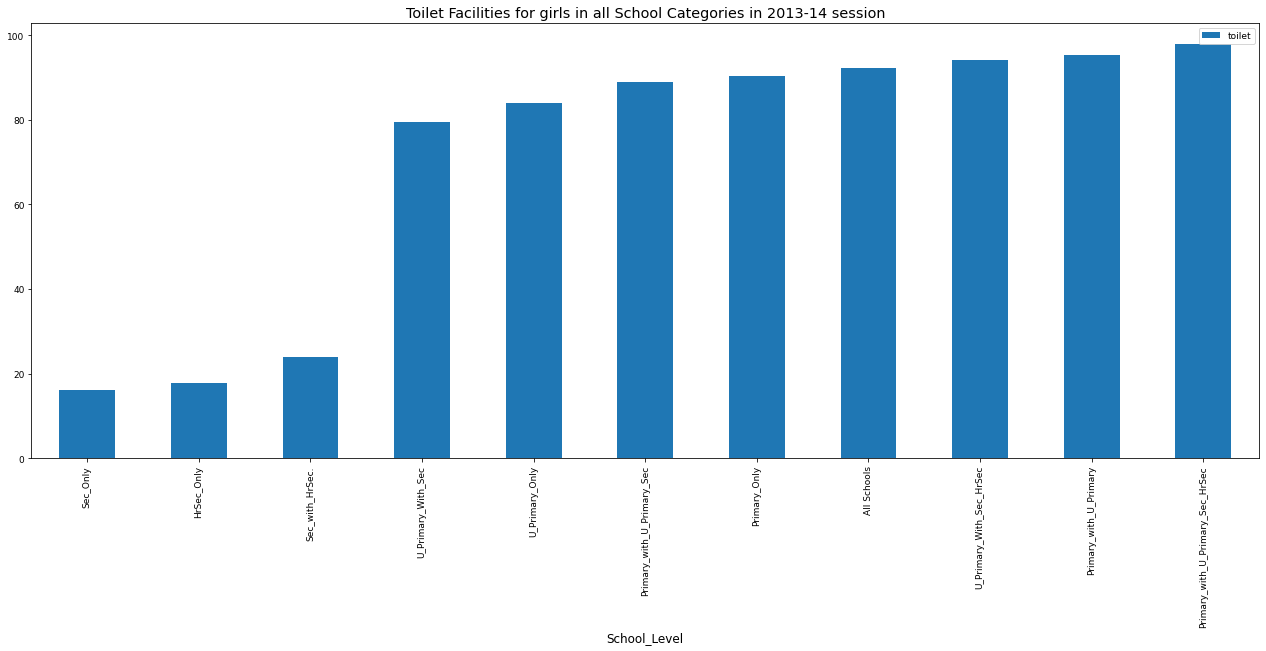

In [21]:
girls_2013 = girls_melt.iloc[np.where(girls_melt.year == '2013-14')]
girls_2013.head(3)
girls_2013.shape

girls_2013.groupby(['School_Level']).mean().sort_values(by = 'toilet').plot(kind = 'bar',
figsize = (22,8),title = 'Toilet Facilities for girls in all School Categories in 2013-14 session')


Same trend  of awful toilet facilities can be observed for secondary school students in 2013-14 session.


Toilet Facilities in 2014-2015 session

<AxesSubplot:title={'center':'Toilet Facilities for girls in all School Categories in 2014-15 session'}, xlabel='School_Level'>

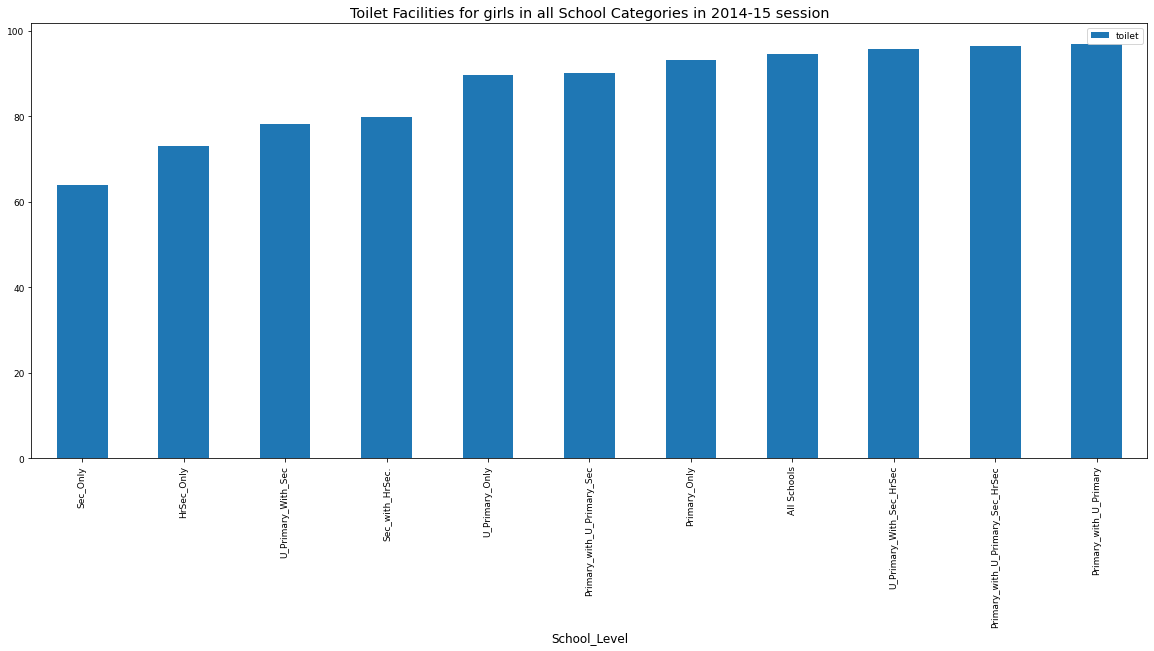

In [22]:
girls_2014 = girls_melt.iloc[np.where(girls_melt.year=='2014-15')]

girls_2014.head(3)
girls_2014.shape

girls_2014.groupby(['School_Level']).mean().sort_values(by='toilet').plot(kind='bar',
figsize=(20,8), title = 'Toilet Facilities for girls in all School Categories in 2014-15 session')

# Once again rapid increase in the toilet facilities in the secondary school category in the 2014-15 session.


Toilet Facilities in 2015-2016 session(GIRLS)

<AxesSubplot:title={'center':'Toilet Failities for girls in all School Categories in 2015-16 session'}, xlabel='School_Level'>

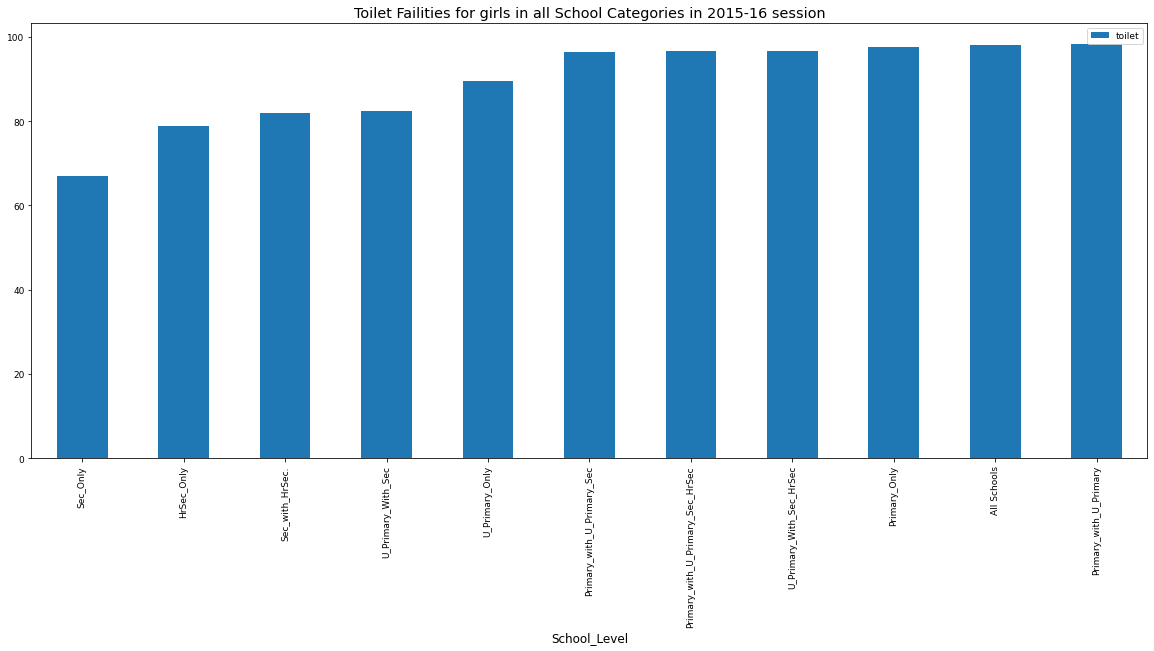

In [23]:
girls_2015 = girls_melt.iloc[np.where(girls_melt.year =='2015-16' )]
girls_2015.head(3)
girls_2015.shape

girls_2015.groupby(['School_Level']).mean().sort_values(by = 'toilet').plot(kind= 'bar',
figsize= (20,8), title = 'Toilet Failities for girls in all School Categories in 2015-16 session')

There's little increase in the toilet facilities of secondary school student

#  Toilet Facillities based on States location of Schools

BOYS

<AxesSubplot:title={'center':'Toilet Facilities for boys in all States for the 3 sessions'}, xlabel='State_UT'>

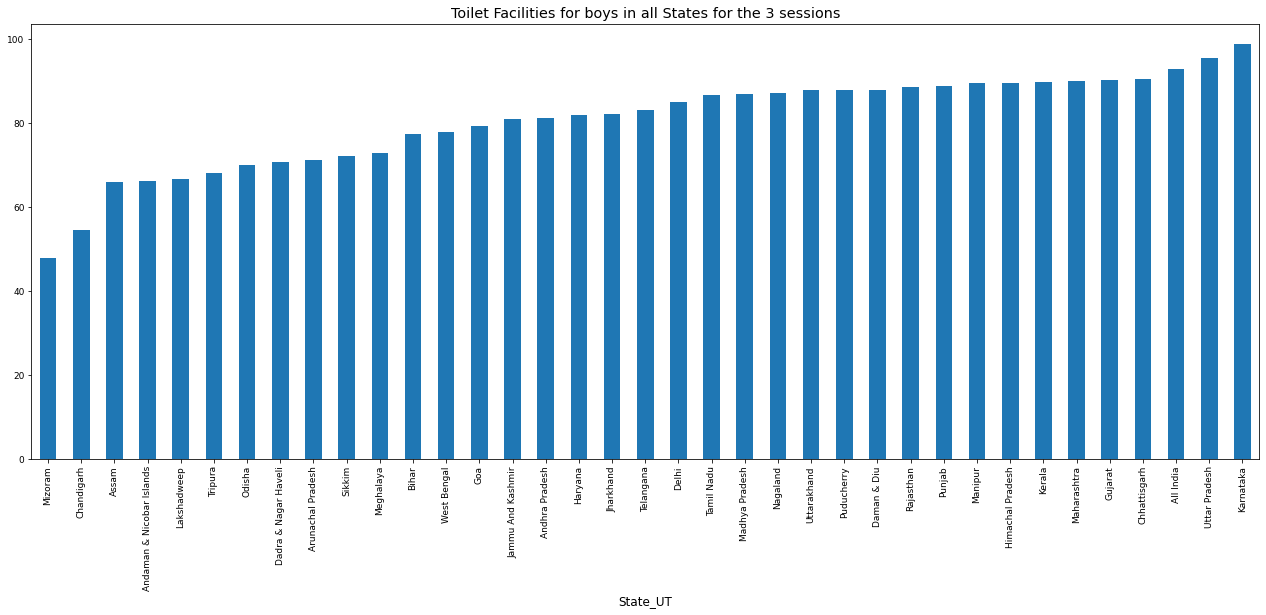

In [24]:
boys_melt.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind = 'bar',
figsize = (22,8)  , title = 'Toilet Facilities for boys in all States for the 3 sessions')


We can see clearly that 'Mizoram' state has the poorest toilet facilities and 'Karnataka' has the best toilet facilities for boys.

Girls

<AxesSubplot:title={'center':'Toilet Failities for girls in all States for the 3 sessions'}, xlabel='State_UT'>

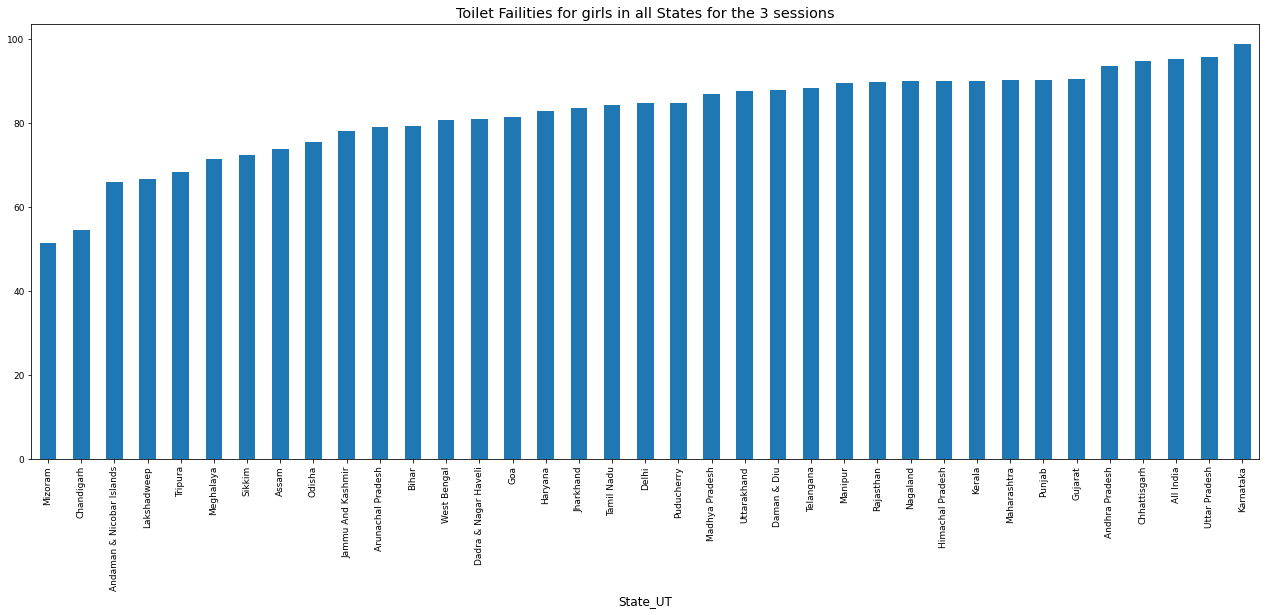

In [25]:
girls_melt.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind = 'bar' ,
 figsize = (22,8), title = 'Toilet Failities for girls in all States for the 3 sessions')

We can see clearly that 'Mizoram' state has the poorest toilet facilities and 'Karnataka' has the best toilet facilities for girls.